<a href="https://colab.research.google.com/github/bsingh17/CNN/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=c21cba4ea06f5195b38264145e4f51c94fa9be1939bc62f24c023b6f46f50e35
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=b70f6997baf9eb51af19d35eb060a927d44895d33d73f362645952e64ba37fdc
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
import numpy
import tensorflow as tf
from tensorflow import keras

In [0]:
dataset=keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


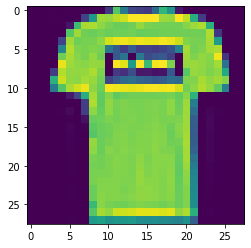

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)


In [0]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten

model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [12]:
model.fit(x_train,y_train,validation_split=0.1,verbose=1,epochs=3)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 150s 3ms/step - loss: 0.3923 - accuracy: 0.8602 - val_loss: 0.3371 - val_accuracy: 0.8782
Epoch 2/3
54000/54000 [==============================] - 150s 3ms/step - loss: 0.2660 - accuracy: 0.9037 - val_loss: 0.2670 - val_accuracy: 0.9037
Epoch 3/3
54000/54000 [==============================] - 149s 3ms/step - loss: 0.2133 - accuracy: 0.9224 - val_loss: 0.2670 - val_accuracy: 0.9038


In [23]:
model.predict(x_test[:4])


array([[8.62147203e-07, 4.23730384e-10, 7.90225840e-08, 1.80114608e-08,
        3.37745831e-08, 6.81849371e-04, 4.61405477e-07, 5.10004116e-04,
        3.18606999e-06, 9.98803496e-01],
       [3.58133138e-06, 2.88978771e-11, 9.99947429e-01, 2.87542541e-08,
        2.33607207e-05, 1.30770715e-11, 2.56441581e-05, 2.47306543e-13,
        1.35543843e-09, 9.29368249e-11],
       [1.57955110e-05, 9.99979377e-01, 1.44459221e-07, 1.92912694e-06,
        1.23112795e-06, 1.39691110e-07, 4.54136710e-07, 1.66285741e-08,
        9.31660111e-07, 2.86008675e-08],
       [1.56367855e-06, 9.99881506e-01, 5.80029536e-09, 7.81323834e-05,
        3.73812290e-05, 1.69852214e-07, 1.10725341e-06, 2.13538609e-08,
        8.16126011e-09, 1.45860653e-07]], dtype=float32)

In [24]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)